In [1]:
import warnings
warnings.filterwarnings('ignore')

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans

## EDA

### 1. Univariate analysis *(10 Marks)*

In [5]:
df = pd.read_csv("Credit_Card_Customer_Data.csv")
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [13]:
df.shape

(660, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
Sl_No                  660 non-null int64
Customer Key           660 non-null int64
Avg_Credit_Limit       660 non-null int64
Total_Credit_Cards     660 non-null int64
Total_visits_bank      660 non-null int64
Total_visits_online    660 non-null int64
Total_calls_made       660 non-null int64
dtypes: int64(7)
memory usage: 36.2 KB


`No null values`



In [9]:
df.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [22]:
df.skew()



<bound method DataFrame.sum of      Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0    False         False             False               False   
1    False         False             False               False   
2    False         False             False               False   
3    False         False             False               False   
4    False         False             False               False   
..     ...           ...               ...                 ...   
655  False         False             False               False   
656  False         False             False               False   
657  False         False             False               False   
658  False         False             False               False   
659  False         False             False               False   

     Total_visits_bank  Total_visits_online  Total_calls_made  
0                False                False             False  
1                False                False     

In [28]:
df.isnull().any()

Sl_No                  False
Customer Key           False
Avg_Credit_Limit       False
Total_Credit_Cards     False
Total_visits_bank      False
Total_visits_online    False
Total_calls_made       False
dtype: bool

`Avg_Credit_Limit and Total Visits online is highly skewed`

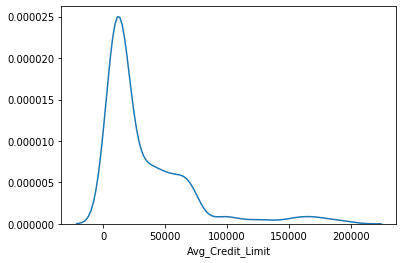

In [11]:
# To see skewness of Avg_Credit_Limit
sns.distplot(df['Avg_Credit_Limit'],hist=False)
plt.show()

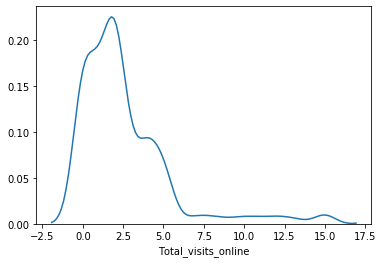

In [15]:
# To see skewness of Avg_Credit_Limit
sns.distplot(df['Total_visits_online'],hist=False)
plt.show()

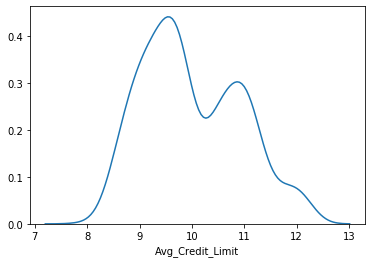

In [14]:

sns.distplot(np.log(df['Avg_Credit_Limit']),hist=False)
plt.show()



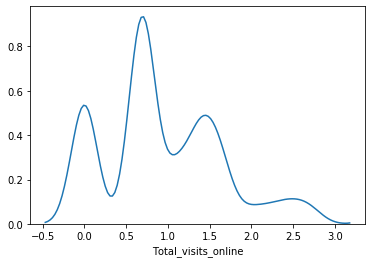

In [17]:
sns.distplot(np.log(df['Total_visits_online']),hist=False)
plt.show()



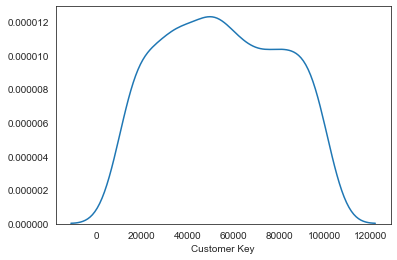

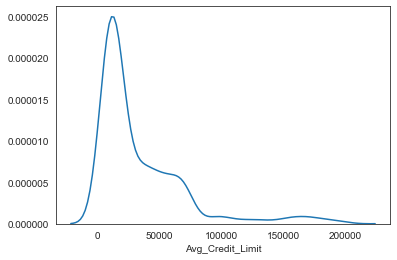

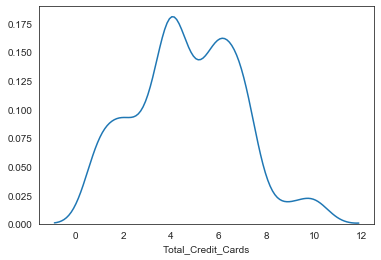

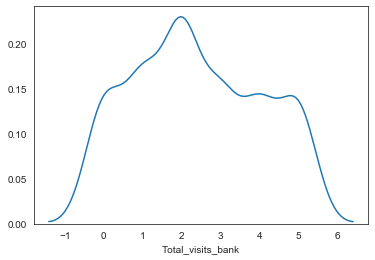

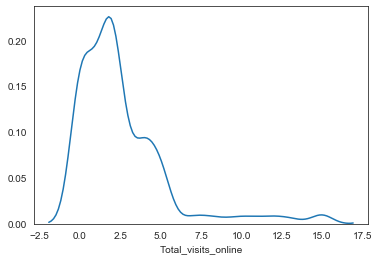

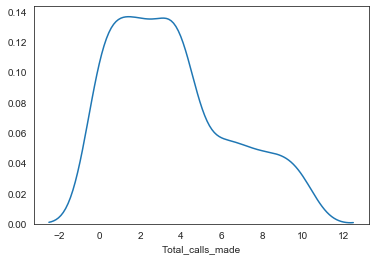

In [32]:
import seaborn as sns

for i in df.columns[df.columns!='Sl_No']:
    sns.distplot(df[i],hist=False,)
    plt.show()

### 2. Bi-variate analysis *(10 marks)*

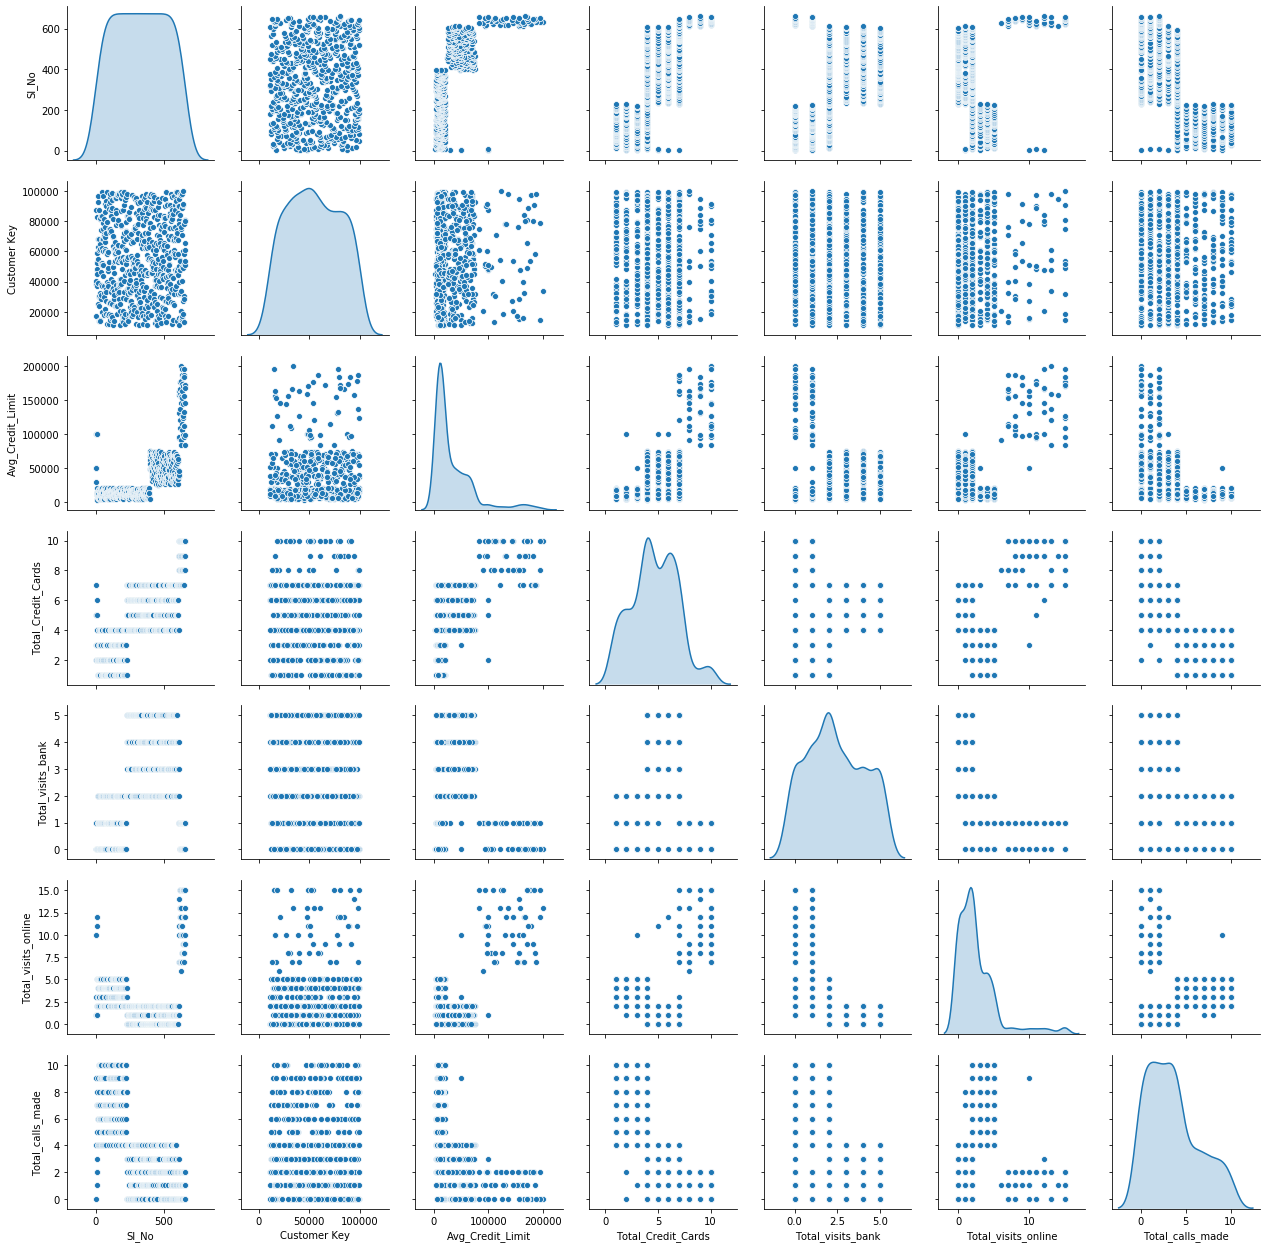

In [30]:
# Pairplot using sns
import seaborn as sns
sns.pairplot(df , diag_kind = 'kde')
plt.show()

`From the graph there seems to be no apparent Corelation between the variables`



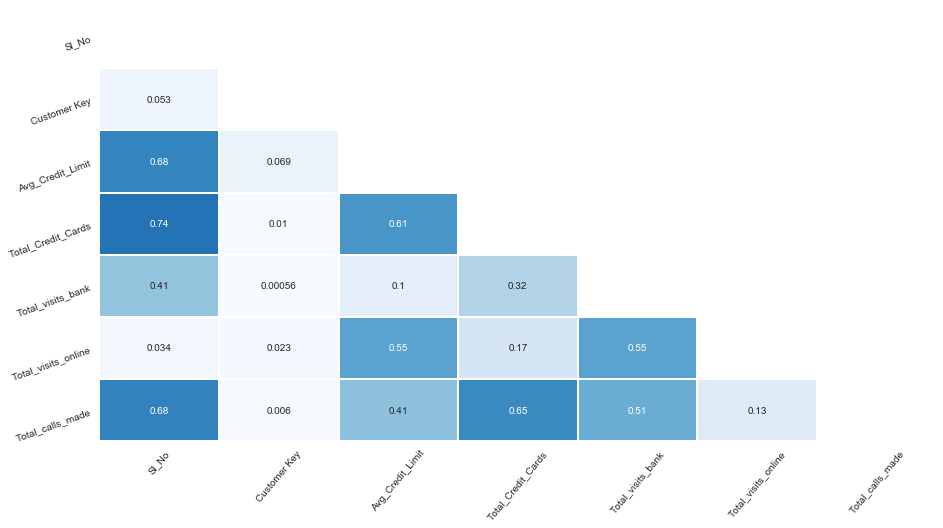

In [31]:
corr = abs(df.corr()) # correlation matrix
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (15,8))  # setting the figure size
sns.set_style(style = 'white')  # Setting it to white so that we do not see the grid lines
sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= False, linewidths= 1, mask = mask)   # Da Heatmap
plt.xticks(rotation = 50)   # Aesthetic purposes
plt.yticks(rotation = 20)   # Aesthetic purposes
plt.show()

# Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we 
#go for any clustering methods. You can use zscore function to do this

In [67]:
CustomerData_df=df

In [68]:
CustomerData_df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [110]:
#method 1
from scipy.stats import zscore
CustomerData_df_z = CustomerData_df.apply(zscore)


In [111]:
CustomerData_df_z.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,SEGMENT
0,-1.729428,1.246920,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,-0.068614
1,-1.724180,-0.653203,0.410293,-0.787585,-1.473731,2.520519,1.891859,-0.068614
2,-1.718931,-1.476098,0.410293,1.058973,-0.860451,0.134290,0.145528,-1.097826
3,-1.713683,-0.571901,-0.121665,0.135694,-0.860451,-0.547490,0.145528,-1.097826
4,-1.708434,-0.300857,1.740187,0.597334,-1.473731,3.202298,-0.203739,-0.068614


In [ ]:
# K Means Clustering 

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

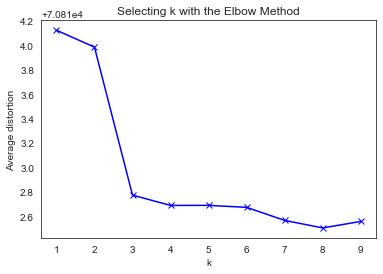

In [169]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(CustomerData_df_z)
    prediction=model.predict(CustomerData_df)
    meanDistortions.append(sum(np.min(cdist(CustomerData_df, model.cluster_centers_, 'euclidean'), axis=1)) / CustomerData_df
                           .shape[0])


    
    
plt.plot(clusters, meanDistortions, 'bx-')


plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')



In [176]:
# Put K as 4 as there is no significant change 
kmeans = KMeans(n_clusters=4, n_init = 15, random_state=2345)

Segment=kmeans.fit(CustomerData_df_z)



In [73]:
centroids = kmeans.cluster_centers_
print(centroids)

[[ 1.4737145   0.06120332  2.83176409  1.86222621 -1.10576269  2.82731942
  -0.87432983]
 [ 0.59711309  0.88567897  0.08612162  0.41624853  0.68460874 -0.56255665
  -0.55879383]
 [-1.12820089  0.01059496 -0.58344723 -1.06168367 -0.90699421  0.31690947
   1.14187193]
 [ 0.34611612 -0.8084943  -0.12919043  0.33836512  0.65629588 -0.53917531
  -0.54107872]]


In [74]:
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2345, tol=0.0001, verbose=0)


In [122]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['LABEL']))

df_labels['LABEL'] = df_labels['LABEL'].astype('category')


In [123]:
# Joining the label dataframe with the data frame.
df_labeled = CustomerData_df.join(df_labels)

In [125]:
df_analysis = (df_labeled.groupby(['LABEL'] , axis=0)).head(4177)  # the groupby creates a groupeddataframe that needs 
# to be converted back to dataframe. 
df_analysis

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,SEGMENT,LABEL
0,1,87073,100000,2,1,1,0,1,0
1,2,38414,50000,3,0,10,9,1,0
2,3,17341,50000,7,1,3,4,0,1
3,4,40496,30000,5,1,1,4,0,0
4,5,47437,100000,6,0,12,3,1,2
...,...,...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0,1,2
656,657,60732,84000,10,1,13,2,1,2
657,658,53834,145000,8,1,9,1,3,2
658,659,80655,172000,10,1,15,0,3,2


In [166]:
# Let us try with K = 4 (to demonstrate the 3d plot)
final_model=KMeans(4)
final_model.fit(CustomerData_df)
prediction=final_model.predict(CustomerData_df)

#Append the prediction 
CustomerData_df["SEGMENT"] = prediction
print("Segment Assigned : \n")
#CustomerData_df.info()
print(CustomerData_df[CustomerData_df["SEGMENT"]==0])

Segment Assigned : 

     Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
5        6         58634             20000                   3   
8        9         82490              5000                   2   
12      13         92503             11000                   1   
14      15         68517              6000                   2   
15      16         55196              8000                   2   
..     ...           ...               ...                 ...   
590    591         94700             36000                   6   
602    603         67415             37000                   7   
604    605         58276             27000                   7   
605    606         85234             36000                   5   
607    608         90191             34000                   6   

     Total_visits_bank  Total_visits_online  Total_calls_made  SEGMENT  
5                    0                    1                 8        0  
8                    0                  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FE975C4548>,
      dtype=object)

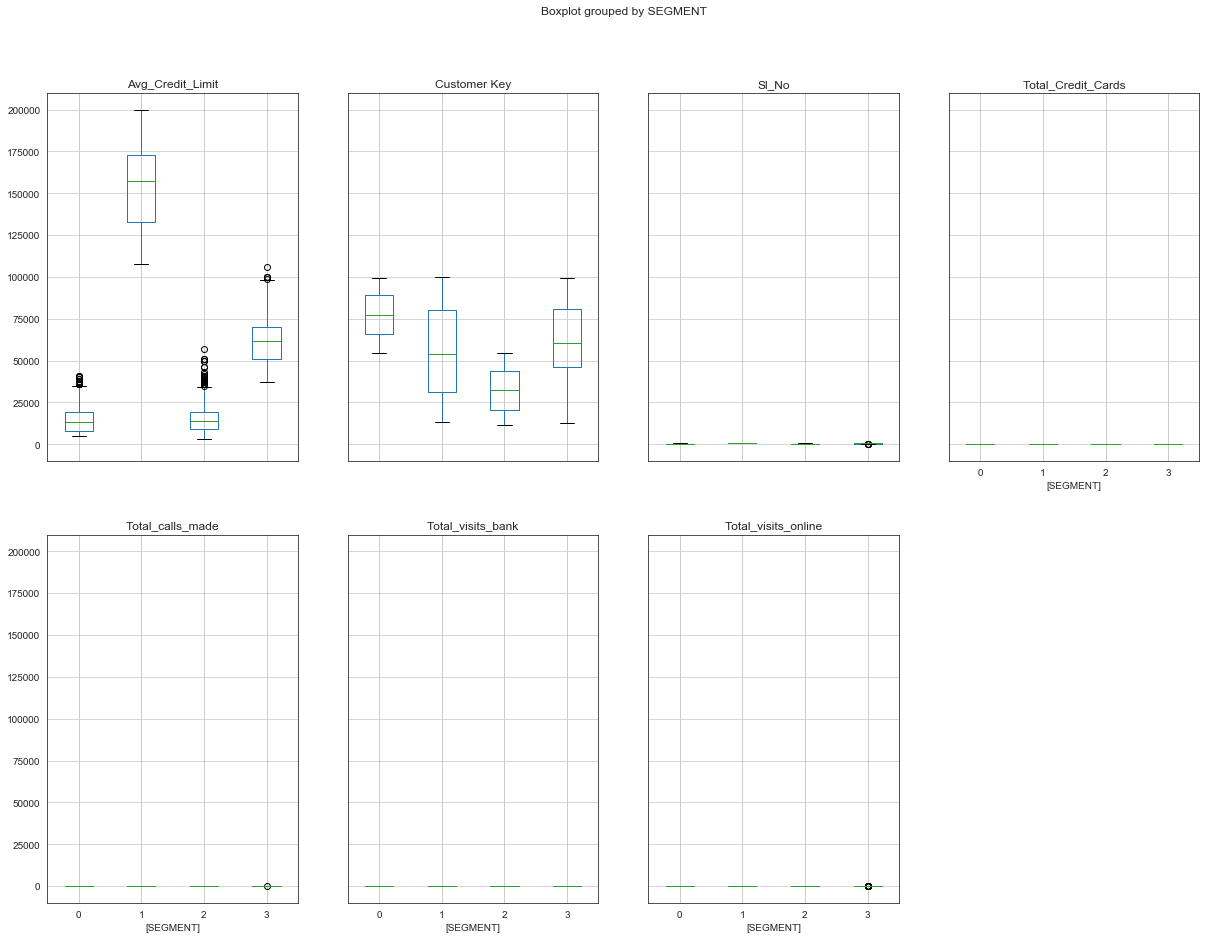

In [167]:
CustomerData_df.boxplot(by = 'SEGMENT',  layout=(2,4), figsize=(20, 15))



In [ ]:
# Average Silhoutte score for K Means with cluster=4

In [178]:
# Calculate Avg Silhoutte Score

from sklearn.metrics import silhouette_score
silhouette_score(CustomerData_df,prediction)

0.44390579832440397

In [179]:
#  K = 4 
final_model=KMeans(4)
final_model.fit(CustomerData_df)
prediction=final_model.predict(CustomerData_df)

silhouette_score(CustomerData_df,prediction)

0.45967874909743517

In [98]:
#Hiearchial Clustering 



In [148]:
#### generate the linkage matrix
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(CustomerData_df_z, 'ward', metric='euclidean')
Z.shape

(659, 4)

Segment Assigned : 

     Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
228    229         54838             10000                   7   
231    232         97825             19000                   6   
232    233         83125             20000                   5   
235    236         83290             13000                   7   
236    237         56486              8000                   7   
..     ...           ...               ...                 ...   
586    587         76398             31000                   7   
590    591         94700             36000                   6   
602    603         67415             37000                   7   
605    606         85234             36000                   5   
607    608         90191             34000                   6   

     Total_visits_bank  Total_visits_online  Total_calls_made  SEGMENT  
228                  2                    0                 0        0  
231                  3                  

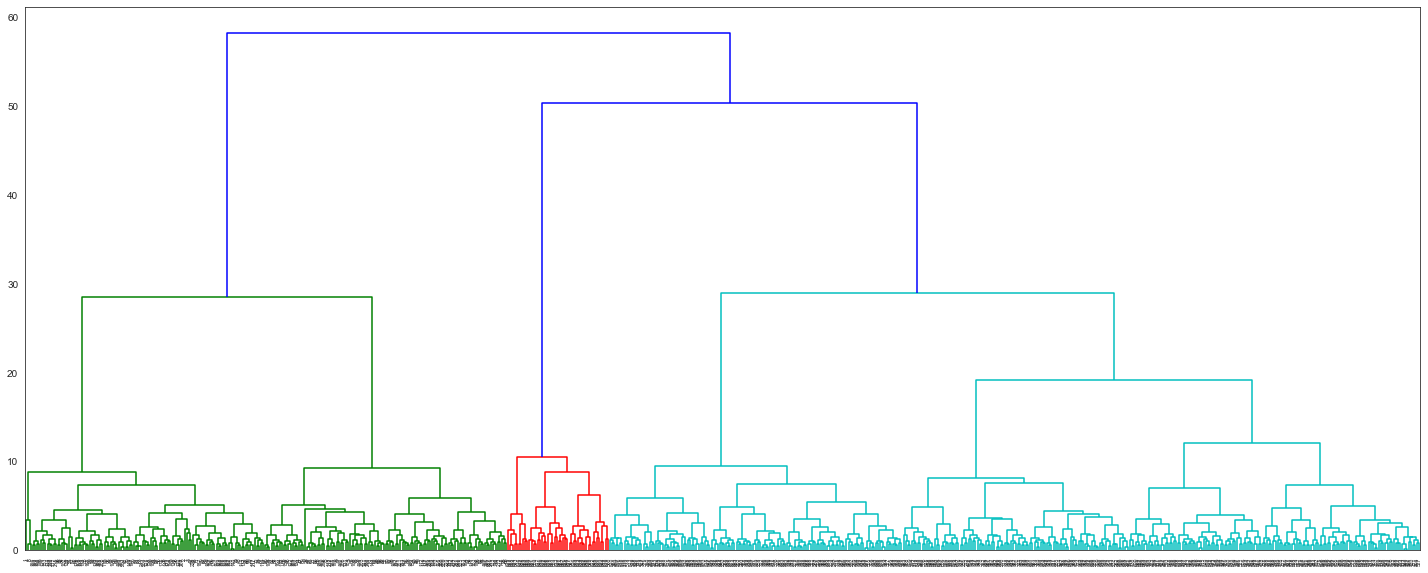

In [140]:
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()

In [141]:
max_d=52
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [142]:
# Calculate Avg Silhoutte Score

from sklearn.metrics import silhouette_score
silhouette_score(CustomerData_df_z,clusters)

0.33559806899430866

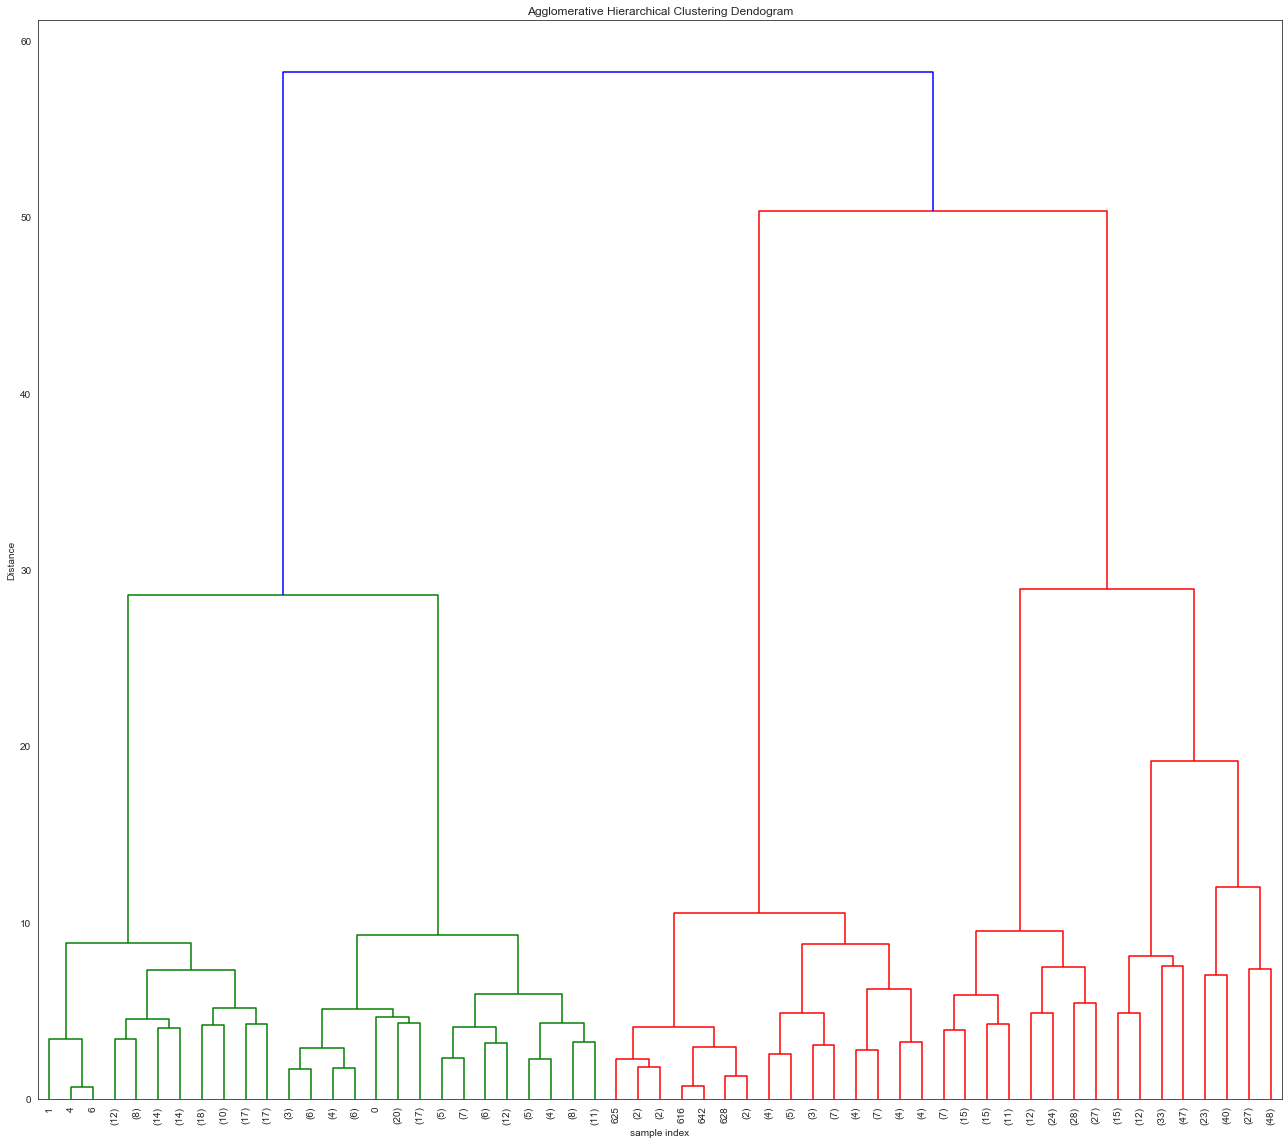

In [135]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(CustomerData_df_z, 'ward')
dendrogram(Z,leaf_rotation=90.0,p=5,color_threshold=52,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

In [163]:
#### generate the linkage matrix
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(CustomerData_df_z, 'ward', metric='euclidean')
Z.shape

(659, 4)

In [164]:
max_d=52
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [165]:
from sklearn.metrics import silhouette_score
silhouette_score(CustomerData_df_z,clusters)

0.33559806899430866

In [ ]:
# In this case  there are 4 main segments of the customer. When comparing Silhoutte coefficient the K means algorithm clusters the group
#better than the Hierachical Clustering